# README
### About Code
This code is a pathfinding algorithm which will compute the the most shortest possible circle which will
contain all the randomly generated points from the system. This code has multiple algorithmic features and also
visuallizes the points on the system.

### Modules 
* Matplotlib
* Numpy
* Math
* CSV

### Language
* Python 3.8

```python
'''
    @author: @yashsehgal   ...github
    @author: @sehgalyash   ...bitbucket
    @coding practice: clean coding with functional programming
'''
```

In [95]:
from matplotlib import pyplot as plt
import numpy as np
import math as math
import csv as csv

'''
    This function will generate random points for the system
    @params: None
    function name: generate_points
'''
def generate_points():
    points = []
    duration = []
    length = 100
    # generating random points for the algorithm
    for count in range(-length, length):
        duration.append(count)
        points.append(np.random.randint(-length, length))
        
    # computing the longest magnitude point from the entire system
    compute_longest_magnitude_point(points, duration, length)

'''
    This function will plot the initial graph of all the random points being scattered
    on the graph.
    @params: points     // all the points which are generated randomly
    @params: duration   // number of iterations 
    function name: plot_points
'''
def plot_points(points, duration):
    plt.scatter(points, duration)
    plt.show()

'''
    This function will apply the longest point computation algorithm and save the details for that point.
    @params: points     // all the points which are generated randomly
    @params: duration   // number of iterations 
    function name: compute_longest_magnitude_point
'''
def compute_longest_magnitude_point(points, duration, length):
    origin_x = 0
    origin_y = 0
    origin = (origin_x, origin_y)
    longest_point = 0
    longest_point_index = 0
    longest_point_x_coordinate = 0
    longest_point_y_coordinate = 0
    possible_paths = []
    possible_points_coordinates = []
    # computing the longest point in the system
    for count in range(len(duration)):
        possible_points_coordinates.append((points[count], duration[count]))
        possible_paths.append((math.sqrt((origin_x - points[count])**2) + (origin_y - duration[count])**2))
        
    # finding the longest point from the list of all possible points
    longest_point = max(possible_paths)
    # finding the index of the longest distant point
    longest_point_index = possible_paths.index(longest_point)
    # storing the x-coordinate of the longest point
    longest_point_x_coordinate = points[longest_point_index]
    # storing the y-coordinate of the longest point
    longest_point_y_coordinate = duration[longest_point_index]
    # storing the coordinates in a constant tuple
    longest_point_coordinate = (longest_point_x_coordinate, longest_point_y_coordinate)
    
    
    longest_point_coordinates = (longest_point_x_coordinate, longest_point_y_coordinate)
    computation_cols = ["origin_x", "origin_y", "origin_coordinates", "longest_point_value",
                       "longest_point_index", "longest_point_x_coordinate", "longest_point_y_coordinate",
                       "longest_point_coordinates", "number_of_possible_paths", "number_of_possible_paths_coordinates"]
    computation_details = [{
        "origin_x": origin_x,
        "origin_y": origin_y,
        "origin_coordinates": origin,
        "longest_point_value": longest_point,
        "longest_point_index": longest_point_index,
        "longest_point_x_coordinate": longest_point_x_coordinate,
        "longest_point_y_coordinate": longest_point_y_coordinate,
        "longest_point_coordinates": longest_point_coordinates,
        "number_of_possible_paths": len(possible_paths),
        "number_of_possible_paths_coordinates": len(possible_points_coordinates)
    }]
    
    plt.scatter(points, duration, color="yellow")
    figure, axes = plt.subplots()
    axes.set(xlim = (-length**2.3, length**2.3), ylim = (-length**2.3, length**2.3))
    circle_plot = plt.Circle((origin_x, origin_y), longest_point)
    axes.add_artist(circle_plot)
    plt.savefig('scatter-plot.png')
    figure.savefig('plot-circle.png')
    
    
    # writing data in a csv file 
    csv_file_name = "computation_details.csv"
    csv_file_open_mode = 'a'
    try:
        with open(csv_file_name, csv_file_open_mode) as csv_file:
            writer = csv.DictWriter(csv_file, computation_cols)
            writer.writeheader()
            for data_writer in computation_details:
                writer.writerow(data_writer)
            print("data successfully saved for this computation!")
    except IOError:
        message = (
            "Something went wrong while inserting the data into CSV \n CSVWritingError"
        )
        message_desc = (
            "Try opening other files or change the opening mode in order to write data in CSV",
        )
        message_file_error = (
            "{}: file not found".format(csv_file_name)
        )
        print(message)

data successfully saved for this computation!


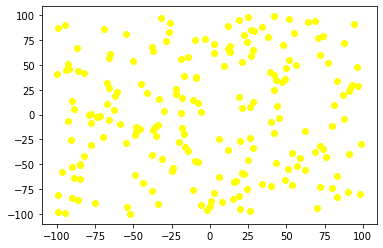

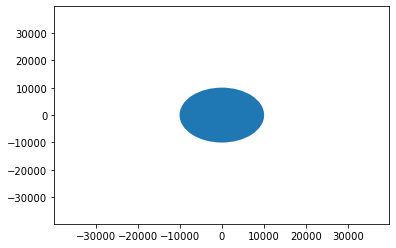

In [96]:
# main method
if __name__ == "__main__":
    generate_points()